In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio

from sklearn.linear_model import Ridge
from sklearn.model_selection import learning_curve, train_test_split, ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

%matplotlib inline

In [2]:
data = sio.loadmat('data/ml-ex5/ex5data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri Nov  4 22:27:26 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[-15.93675813],
        [-29.15297922],
        [ 36.18954863],
        [ 37.49218733],
        [-48.05882945],
        [ -8.94145794],
        [ 15.30779289],
        [-34.70626581],
        [  1.38915437],
        [-44.38375985],
        [  7.01350208],
        [ 22.76274892]]),
 'y': array([[ 2.13431051],
        [ 1.17325668],
        [34.35910918],
        [36.83795516],
        [ 2.80896507],
        [ 2.12107248],
        [14.71026831],
        [ 2.61418439],
        [ 3.74017167],
        [ 3.73169131],
        [ 7.62765885],
        [22.7524283 ]]),
 'Xtest': array([[-33.31800399],
        [-37.91216403],
        [-51.20693795],
        [ -6.13259585],
        [ 21.26118327],
        [-40.31952949],
        [-14.54153167],
        [ 32.55976024],
        [ 13.39343255],
        [ 44.20988595],
        [ -1.14267768],
        [-

In [3]:
X = data['X']
y = data['y']
x_val = data['Xval']
y_val = data['yval']
X_test = data['Xtest']
y_test = data['ytest']

print('X train shape ---> {}'.format(X.shape))
print('y train shape ---> {}'.format(y.shape))
print('X val shape ---> {}'.format(x_val.shape))
print('y val shape ---> {}'.format(y_val.shape))
print('X test shape ---> {}'.format(X_test.shape))
print('y test shape ---> {}'.format(y_test.shape))

X train shape ---> (12, 1)
y train shape ---> (12, 1)
X val shape ---> (21, 1)
y val shape ---> (21, 1)
X test shape ---> (21, 1)
y test shape ---> (21, 1)


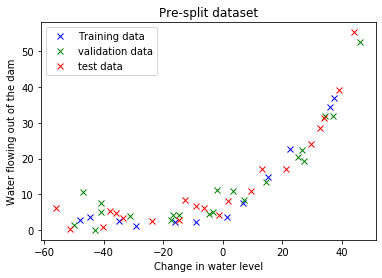

In [5]:
# Plot the datasets
plt.plot(X, y, 'bx', label='Training data')
plt.plot(x_val, y_val, 'gx', label='validation data')
plt.plot(X_test, y_test, 'rx', label='test data')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dam')
plt.title('Pre-split dataset')
plt.legend()


In [7]:
# concatenate the pre split datasets
X = np.concatenate([X, x_val, X_test])
y = np.concatenate([y, y_val, y_test]).ravel()

X.shape, y.shape

((54, 1), (54,))

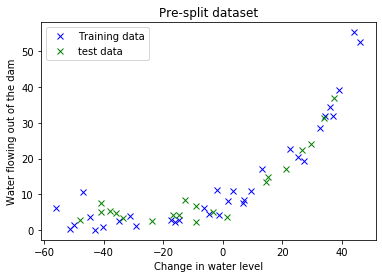

In [9]:
# split the concatenated dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=21, random_state=42)

# Plot the datasets
plt.plot(X_train, y_train, 'bx', label='Training data')
plt.plot(X_test, y_test, 'gx', label='test data')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dam')
plt.title('Pre-split dataset')
plt.legend()


In [17]:
# Plot training data and predictions by a trained model
def plot_training_data_and_predictions(X_train, y_train, X_pred, y_pred, title=''):
    plt.plot(X_train, y_train, 'bx', label='Training data')
    plt.plot(X_pred, y_pred, 'b--', label='Prediction')
    plt.xlabel('Change in water level')
    plt.ylabel('Water flowing out of the dam')
    plt.title(title)
    plt.legend()

In [11]:
# Plot learning curves obtained by training on different training set sizes
def plot_learning_curves(train_sizes, train_scores, test_scores, y_min=-1, y_max=1, title=''):
    plt.plot(train_sizes, train_scores, 'b-', label='Training Score')
    plt.plot(train_sizes, test_scores, 'g-', label='Test Score')
    
    plt.grid(True, axis='y')
    plt.xlabel('Training set size')
    plt.ylabel('Score')
    plt.xlim(xmin=1)
    plt.ylim(y_min, y_max)
    plt.title(title)
    plt.legend()

In [23]:
def compute_learning_curves(regressor, X_train, y_train, test_size):
    # Train/test split using test_size examples
    cv = ShuffleSplit(n_splits=50, test_size=test_size, random_state=0)
    # Relative training set sizes
    train_sizes_rel = np.linspace(.1, 1.0, 10)
    # Generate learning curves
    train_sizes, train_scores, test_scores = learning_curve(regressor, X_train, y_train, cv=cv, train_sizes=train_sizes_rel)
    # Return training set sizes and average learning values
    return [train_sizes, np.mean(train_scores, axis=1), np.mean(test_scores, axis=1)]

## Linear Regression

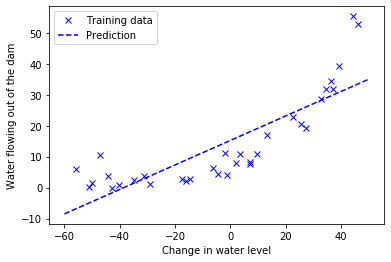

In [24]:
model = Ridge()
model.fit(X_train, y_train)

X_pred = np.array([[-60], [50]])
y_pred = model.predict(X_pred)

plot_training_data_and_predictions(X_train, y_train, X_pred, y_pred)

In [25]:
train_sizes, train_scores, test_scores = compute_learning_curves(model, X_train, y_train, test_size=21)

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetri

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetri

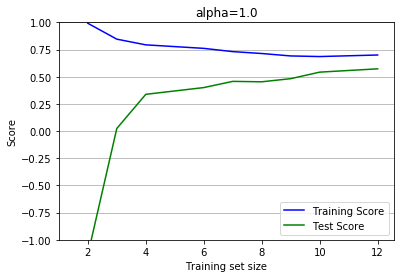

In [27]:

alpha=1.0
plot_learning_curves(train_sizes, train_scores, test_scores, title=f'alpha={alpha}')


In [28]:
model.score(X_test, y_test)

0.6008412749978652

## Polynomial Regression

### Overfit example

In [31]:
# Create a linear regressor with alpha
# Add Polynomial features of degree 8
# Scale before running regularized linear regression
alpha = 0.001
model = Pipeline(steps=[
                ('poly', PolynomialFeatures(degree=8)),
                ('scaler', StandardScaler()),
                ('reg', Ridge(alpha=alpha))])

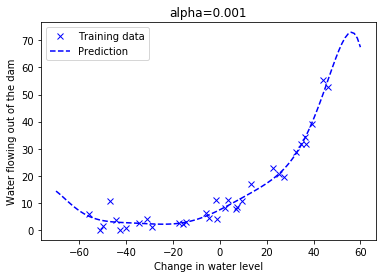

In [32]:
model.fit(X_train, y_train)

X_pred = np.linspace(-70, 60, 100).reshape(-1,1)
y_pred = model.predict(X_pred)

plot_training_data_and_predictions(X_train, y_train, X_pred, y_pred, f'alpha={alpha}')


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetri

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetri

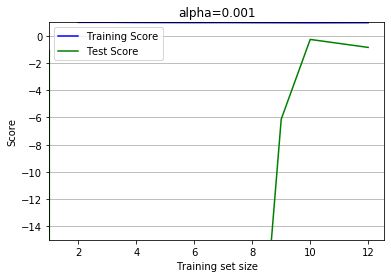

In [33]:
train_sizes, train_scores, test_scores = compute_learning_curves(model, X_train, y_train, test_size=21)
plot_learning_curves(train_sizes, train_scores, test_scores, y_min=-15, title=f'alpha={alpha}')

### Goodfit example

In [ ]:
alpha = 1
model = Pipeline(steps=[
                ('poly', PolynomialFeatures(degree=8)),
                ('scaler', StandardScaler()),
                ('reg', Ridge(alpha=alpha))])

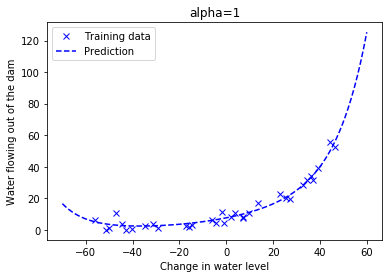

In [35]:
model.fit(X_train, y_train)

X_pred = np.linspace(-70, 60, 100).reshape(-1,1)
y_pred = model.predict(X_pred)

plot_training_data_and_predictions(X_train, y_train, X_pred, y_pred, f'alpha={alpha}')

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetri

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetri

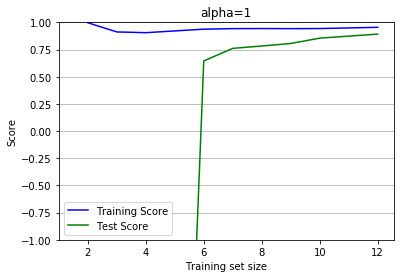

In [36]:

train_sizes, train_scores, test_scores = compute_learning_curves(model, X_train, y_train, test_size=21)
plot_learning_curves(train_sizes, train_scores, test_scores, title=f'alpha={alpha}')

In [37]:
model.score(X_test, y_test)

0.9520757860053534

### Underfit example

In [38]:
alpha = 100
model = Pipeline(steps=[
                ('poly', PolynomialFeatures(degree=8)),
                ('scaler', StandardScaler()),
                ('reg', Ridge(alpha=alpha))])

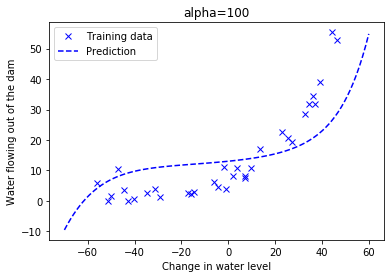

In [39]:
model.fit(X_train, y_train)

X_pred = np.linspace(-70, 60, 100).reshape(-1,1)
y_pred = model.predict(X_pred)

plot_training_data_and_predictions(X_train, y_train, X_pred, y_pred, f'alpha={alpha}')

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetri

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetri

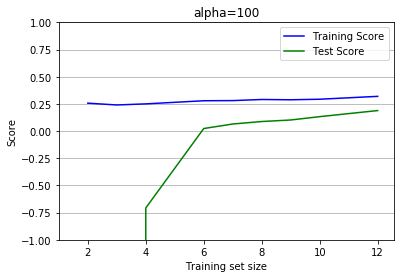

In [40]:
train_sizes, train_scores, test_scores = compute_learning_curves(model, X_train, y_train, test_size=21)
plot_learning_curves(train_sizes, train_scores, test_scores, title=f'alpha={alpha}')

In [41]:
model.score(X_test, y_test)

0.4516618676909657